# "Avustralya'da yarın yağmur var mı?"

# GİRİŞ 
Akbank ve Global AI Hub işbirliğinde hazırlanan Makine Öğrenmesine Giriş Bootcamp'ine proje konusu olarak dahil edeceğim Avustralya'da yağan yağmurların günlük verilerine ulaşabileceğimiz bir dataset üzerinden projeyi oluşturacağız. Kapsam dahilinde makine öğrenmesi algoritmalarından denetimli öğrenme çeşitlerini inceleyecek ve modellerin doğruluk, kesinlik, tahmini değerlerine göre yorumlarda bulunacağız.

Notebook ve dataset erişimi için kullanabileceğiniz GitHub linki: https://github.com/iremtursun/machine-learning-bootcamp-global-ai-hub

Veri setini almak için kullandığım kaynak: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data

# TANIM
Avustralya'da 01.12.2008 - 25.06.2017 seneleri arasında günlük olarak yağmur yağan bölgelerle birlikte işlenen datalar **weatherAUS.csv** dosyasında bulunmaktadır. Veri seti yağmur yağmasına etki eden sıcaklık, basınç, yağış miktarı, güneş ışığı miktarı, rüzgar hızı, nem ve ertesi günün yağmur yağmasına göre hazırlanan faktörleri içermektedir. Meteorolojik verilerin yer aldığı bu sette ana konumuz yarın yağmur yağıp yağmama olasılığını değerlendirmektir.

Ayrıca bu data .csv dosyasından ilk okunan değerlere göre 23 sütun, 145.460 satırdan oluşarak büyük bir datayı simgelemektedir.

Buradaki amacımız ana etkenlere bağlı kalarak "Avustralya'da yarın yağmur yağacak mı?" sorusunu tahminleyen modeli oluşturmaktır. Bu bir sınıflandırma problemi olduğu için Karar Ağaçları, SVM ve Lojistik Regresyon modelleri arasındaki değerlendirmeleri inceleyeceğiz.

Temel kütüphanelerimizi çekerek ilgili geliştirmelerimize başlayabiliriz:

In [2]:
import numpy as np  #Numpy kütüphanesi, matematiksel işlemleri hızlıca yapmayı sağlayan ve içerisinde birçok modül bulunduran sayısal bir Python kütüphanesidir.
import pandas as pd  #Pandas kütüphanesi, veri bilimi çalışmaları için ön işleme, okuma ve analiz etme geliştirmelerini veren bir yazılımsal kütüphanedir.
import matplotlib.pyplot as plt  #Matplotlib, içerisinde bulunan özel fonksiyonları ile matematiksel modellemeleri grafikleştirmeye yarayan gelişmiş bir kütüphanedir.
import seaborn as sns  #Seaborn, ileri seviye görselleştirmeye yarayan bir kütüphanedir.

In [3]:
df = pd.read_csv('/kaggle/input/weatheraus/weatherAUS.csv')  #Pandas kütüphanesi ile .csv formatlı datasetin yolu alınarak dosyayı okuyor ve arka planda veriler kaydedilerek "df" değişkenine atanıyor.

Yukarıda datanın göz ile okumasına dayalı olarak sütun ve satır sayısını ekledik. Ancak Pandas kütüphanesi ile dosyasını okuttuğumuz **df** değişkenini, Keşifsel Veri Analizi yapmaya başlayarak çok daha kolay bir şekilde inceleyebiliriz:

# KEŞİFSEL VERİ ANALİZİ

In [4]:
df.info()  #Datanın tüm bilgileri sütun ve satır bilgisine bağlı olarak veri tipini ve sayısını da getiriyor.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Data 23 sütundan ve içerisinde 145.460 satır bulunan string (7 sütun değeri) ve float (16 sütun değeri) değerlerden oluşan karışık bir seti içeriyor. Bazı sütunlarda NON değerler bulunduğu için <145.460 olması datamızda bazı ön işlemeler yapmamız gerektiğini vurguluyor.

Bunun yanı sıra betimleyici istatistik değerlerimizi de alabiliriz:

In [5]:
df.describe()  #Datanın temel istatistik bilgilerini describe() fonkisyonu ile kolayca alabiliriz.

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Bu tabloda 16 özelliğin bilgilerini içeren birtakım değerler görmekteyiz:
* **count** değeri o sütuna ait kaç satır olduğunu saydırır.
* **mean** satırlara bağlı olarak ilgili sütunun aritmetik ortalamasını verir.
* **std** ilgili sütunun standart sapmasını verir.
* **min** ve **max** değerleri satır boyunca o sütunun hangi değerinin en büyük ve en küçük olduğunu belirtir.
* **25%, 50%, 75%** değerleri ise çeyreklik ve yarımlığı hesaplar.

NOT: Geriye kalan 7 özelliğin tipi string olduğu için matematiksel hesaplamalarda bulunulamaz. Değerlendirmelerimiz için rüzgarın yönü, tarihler, lokasyonlardan oluşan objeleri almak yerine **RainTomorrow** değişkeni üzerinden tahminlemelerde bulunacağız.

# DATA PREPROCESSING

**VERİ ÖN İŞLEME - STRİNG DEĞERLER**

Tahmin etmeye çalıştığımız **RainTomorrow** değişkeni string olarak (No - Yes) olarak tutulmaktadır. Değişkenin dağılımını görselleştirmek, yorumlamamız açısından faydalı olacaktır.

In [6]:
print(df['RainTomorrow'].value_counts(dropna=False))

RainTomorrow
No     110316
Yes     31877
NaN      3267
Name: count, dtype: int64


Tahmini olarak "Yes" cevabının 31.877 adet ve "No" cevabının 110.316 adet görülmüştür. Bunun yanı sıra "NA" yani bilinmeyen durumlar için de sayım yapılmış ve 3.267 adet tahmini cevap eklenmiştir.

"NA" olan eksik değerler, makine öğrenmesi algoritmalarını olumsuz etkileyebileceği gibi şaşırtan sonuçlar da verebilir. Bu gibi durumlarda, özellikle string değerler için eksik değerlerde en çok sayan, yani modunu gördüğümüz değerleri yerleştirebiliriz. O halde "NA" değerleri "No" cevap değerleri ile doldurulmalıdır. 

In [7]:
df2 = df.copy()  #Orijinal df değişkeninde kalıcı değişiklikler yapmamak için sanal bir kopyasını oluşturalım.

df2['RainTomorrow'].replace(['NaN', 'nan', 'NA'], np.nan)  #RainTomorrow sütunun içerisinde NaN-nan-NA gibi değerleri gerçek bir NAN olarak değerlendirir.
df2['RainTomorrow'] = df2['RainTomorrow'].fillna('No')  #Sayılan NAN'lar yerine mod olarak eklenmesini istediğimiz "No" değerleri eklenir.

print(df2['RainTomorrow'].isna().sum() , "adet NA değeri vardır.")  #Toplamdaki NAN değerlerinin 0 olması gerekmekte. Kontrol sağlıyoruz.
print("Sadece", df2['RainTomorrow'].unique(), "değişkenleri kalacak şekilde güncellenmiştir.")  #Sadece "No" ve "Yes" değişkenlerimizin kaldığından emin olmalıyız.
print(df2['RainTomorrow'].value_counts())  #Son olarak tüm değerleri saydırıyoruz.


0 adet NA değeri vardır.
Sadece ['No' 'Yes'] değişkenleri kalacak şekilde güncellenmiştir.
RainTomorrow
No     113583
Yes     31877
Name: count, dtype: int64


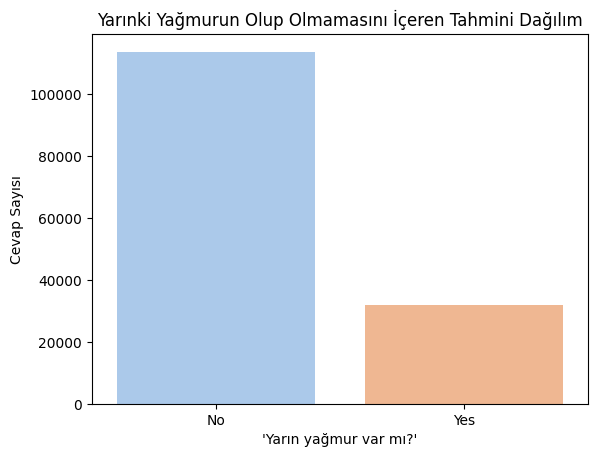

RainTomorrow
No     113583
Yes     31877
Name: count, dtype: int64
RainTomorrow
No     78.085384
Yes    21.914616
Name: proportion, dtype: float64


In [8]:
#df değişkeninde tutulan datayı Pastel tonlarında, kartezyen sistemde gösterebiliriz. Buradaki görselleştirme işlemlerinde çizimi Matplotlib ve tasarımı Seaborn kütüphanesi yapacak şekilde yukarıda kodlanmıştır.

sns.countplot(x="RainTomorrow", data=df2, palette="pastel")  
plt.title("Yarınki Yağmurun Olup Olmamasını İçeren Tahmini Dağılım")
plt.xlabel("'Yarın yağmur var mı?'")
plt.ylabel("Cevap Sayısı")
plt.show()

print(df2["RainTomorrow"].value_counts()) #Grafik değerleri tam okunamayacağından cevap sayılarını saydırabiliriz.
print(df2["RainTomorrow"].value_counts(normalize=True) * 100) #Benzer olarak yüzdelik değerlerini de hesaplattırabiliriz.


Görselleştirme neticesinde cevap sayısına göre datadan alınan değerler kıyaslanmıştır. Tahmini olarak "Yes" cevabının 31.877 adet ile %21.9 olduğu ve "No" cevabının 113.583 adet ile %78.0 olduğu görülmüştür. Çoğunluk olarak 22 sütunlu özellikler bağlamında "No" cevabının verildiği görülmüştür.

Makine öğrenmesi modellerinde ağırlıklı olarak sayısal verilerle çalışılır. Bu durumda string değerleri 2 yöntem ile nümerik verilere dönüştürebiliriz:

1. One - Hot Encoding
2. Label Encoding

In [9]:
print("ENCODİNG ÖNCESİ VERİ")
import warnings  #Uyarıları empoze etmemizi sağlayan gelişmiş bir Warnings kütüphanesi kullanmaktayız.
warnings.filterwarnings("ignore", category=RuntimeWarning) #Bu çıktı sırasında sayısal değerlerin çok üzerinde ya da çok altında olan bazı Pandas uyarılarını gizlemek için eklenmiştir.
df2.head(15)  #Datanın ilk 15 satırını gözlemleyebiliriz.

ENCODİNG ÖNCESİ VERİ


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [10]:
print("ENCODİNG SONRASI VERİ")

from sklearn.preprocessing import LabelEncoder  #Sklearn kütüphanesi, makine öğrenmesi modelleri için çalışan ve ön işleme adımlarında kullanılan yaygın bir kütüphanedir.
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) #Bu çıktı sırasında sayısal değerlerin çok üzerinde ya da çok altında olan bazı Pandas uyarılarını gizlemek için eklenmiştir.

def labelEncoder():  #Label Encoder'ı işleme sokabilmek için tanımladığımız bu fonksiyon üzerinden algoritmamıza devam edebiliriz.
    le = LabelEncoder() #Fonksiyonu çağırıp 'le' değişkenine atıyoruz.
    df2["RainTomorrow"] = le.fit_transform(df2["RainTomorrow"])  #Atadığımız değişken üzerinden fonksiyonu kullanmak için dönüştürücü ile RainTomorrow özel değişkenini alıyoruz.
    return df2.head(15)

labelEncoder()


ENCODİNG SONRASI VERİ


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0


Buraya kadar **RainTomorrow** string değerlerinden oluşan hedef değişkenimiz için basit bir veri temizleme ve veri manipülasyonu yaparak ön işlem adımlarını tamamladık. Özellik seçimi korelasyon matrisinin oluşturulabilmesi için diğer anlamlı değişkenlerin de sayısal olarak ön işlemden geçirmeli ve aralarındaki ilişkiyi inceleyebilmeliyiz.

**VERİ ÖN İŞLEME - NÜMERİK DEĞERLER**

**MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm** sayısal veri tipinde olan değişkenler de Avustralya'da yağmur yağma olasılığını etkileyen faktörler olarak veri setinde belirlenmiştir. Bu değişkenlerin de içerisinde eksik değer olup olmamasına bakarak ilgili işlemleri gerçekleştirebiliriz.


In [11]:
columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

nan_counts = df2[columns].isna().sum().reset_index() #columns listesinde bulunan tüm değişkenlerin tüm sayısal değerleri indexi artan şekilde tutulabilir.
nan_counts.columns = ['Variable', 'NaN_Count'] #Özet sunmak için sadece NaN eksik değerlerinden kaç adet olduğunu göstermek için iki sütun açabiliriz.

nan_counts = nan_counts[nan_counts['NaN_Count'] > 0] #Sadece NaN olan eksik değerler alınır, NaN_Count sütununa eklenir.
print(nan_counts) 

         Variable  NaN_Count
0         MinTemp       1485
1         MaxTemp       1261
2        Rainfall       3261
3     Evaporation      62790
4        Sunshine      69835
5   WindGustSpeed      10263
6    WindSpeed9am       1767
7    WindSpeed3pm       3062
8     Humidity9am       2654
9     Humidity3pm       4507
10    Pressure9am      15065
11    Pressure3pm      15028
12       Cloud9am      55888
13       Cloud3pm      59358
14        Temp9am       1767
15        Temp3pm       3609


16 adet sayısal değişkenin kendi satırları için ne kadar eksik değere sahip olduğunu gözlemlemekteyiz. Burada makine öğrenmesi algoritmalarını daha doğru sonuçlar almak için kullandığımızda eksik değerleri doldurmamız / silmemiz gerekebilir. Sayısal değerler için NaN değerlerin yerine tanımlayıcı istatistik tablosunu kullanarak bazı değerlemeleri(ortalama,ortanca) yazdırabiliriz. 

Kontrol sağlamak için bu değişkenlerin grafiklerine bakarak normal dağılıp dağılmamasına göre yorumlarda bulunabiliriz.

**EKSİK DEĞERLERİN TESPİTİ VE GÜNCELLENMESİ**

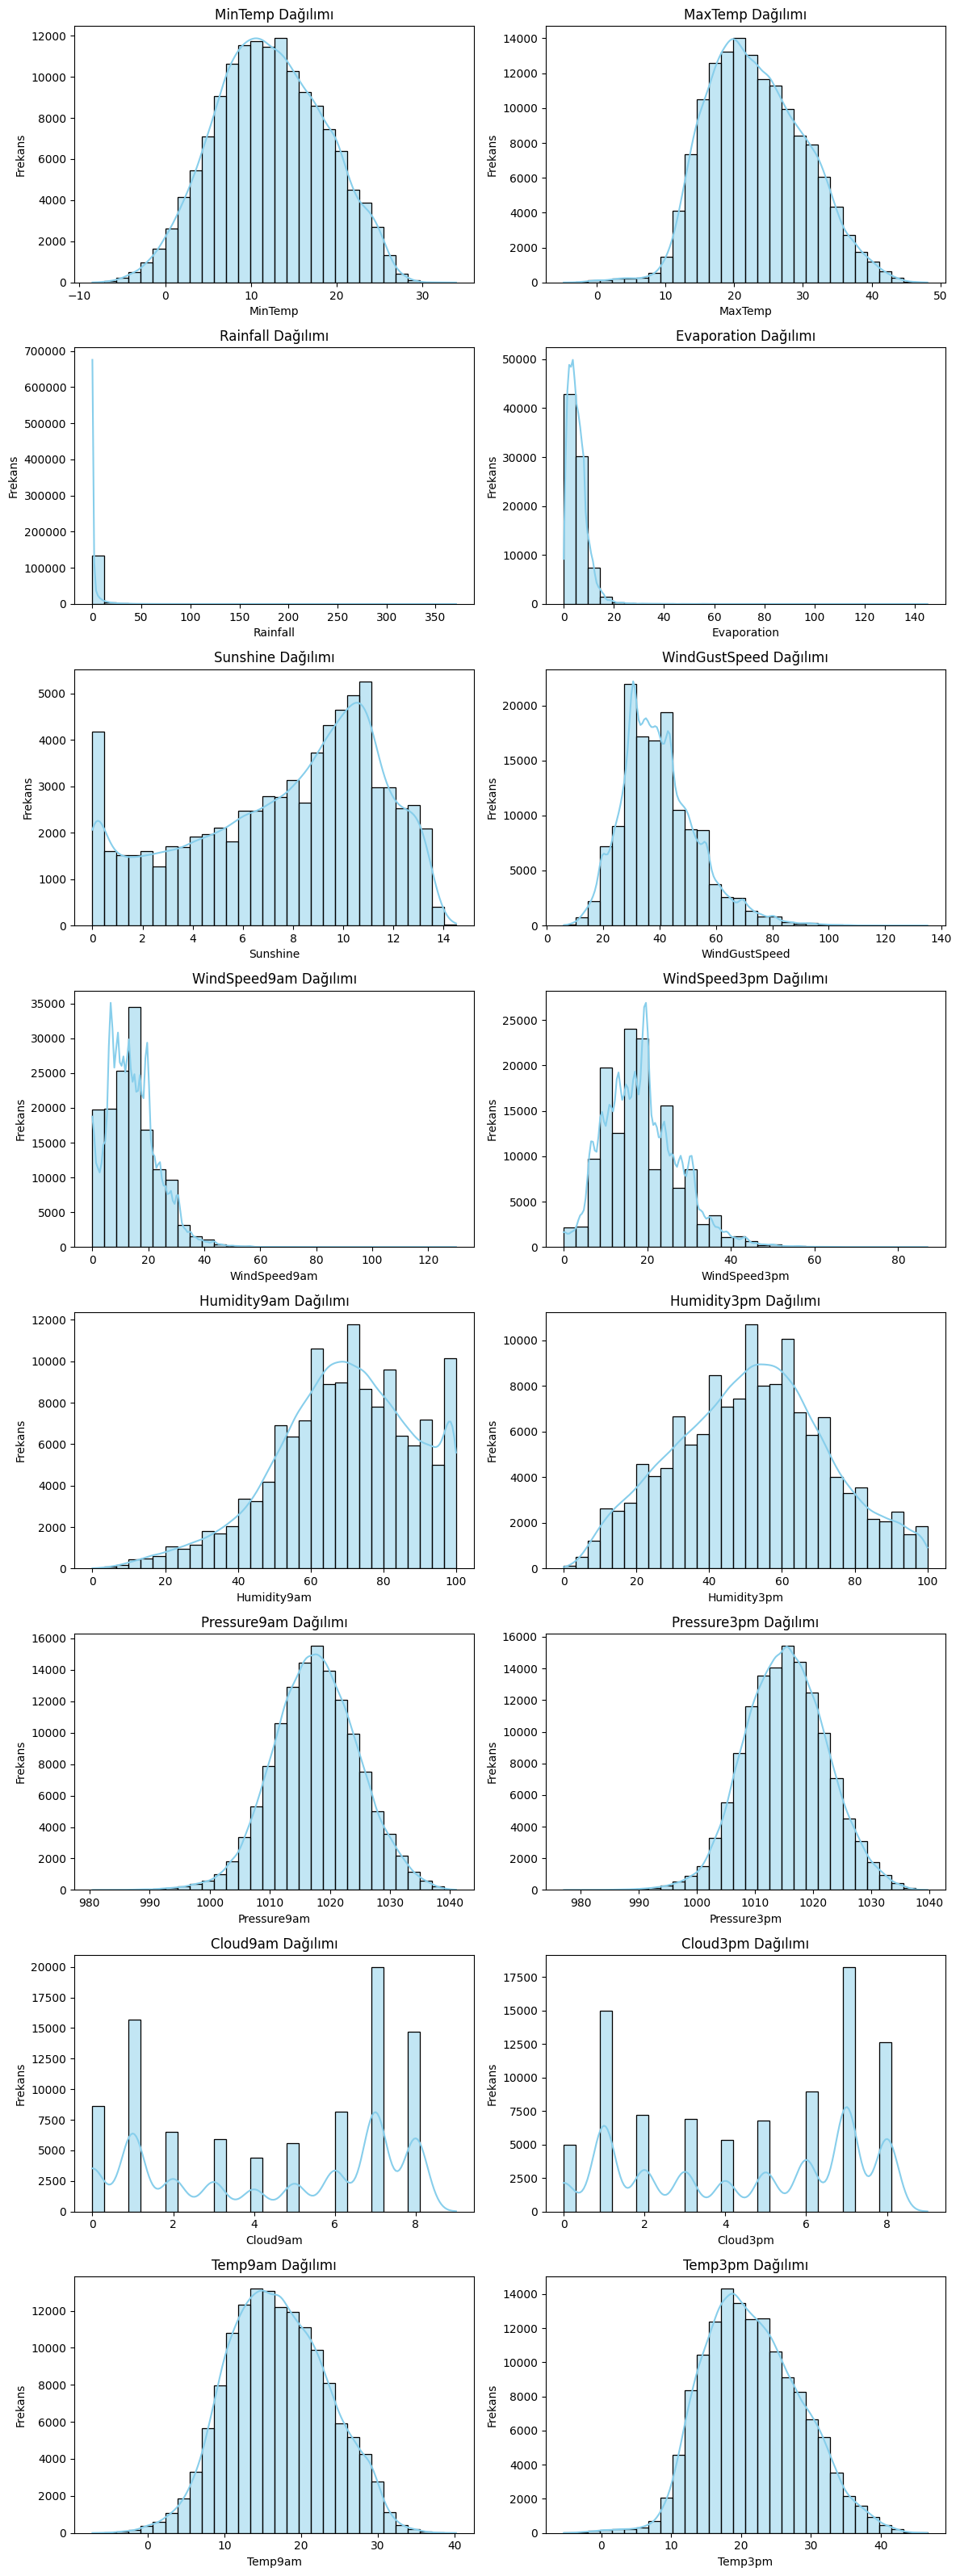

In [12]:
import math
warnings.filterwarnings("ignore", category=FutureWarning) #Grafik çizdirirken Pandas'a bağlı zaman serileri uyarısı gözüktüğü için bazı bölünebilme hataları çıktığından bu uyarıların görünmesini kapatıyoruz.

n = len(columns) #columns dizisinin uzunluğu alınır
rows = math.ceil(n / 2)  #16 adet değişken olduğu için ikili grafikler oluşturmak adına 2x8 olacak şekilde satır sayısı belirliyoruz.

fig, axes = plt.subplots(rows, 2, figsize=(12, rows * 4))  #Toplam grid alanı görselleştirme için belirlenir.
axes = axes.flatten() #İkili grafikler tek bir satırda yazdırılır.

for i, col in enumerate(columns): # i -> hangi grafik olacağı üzerinde döner, col -> columns'dan değişkenleri alır.
    sns.histplot(df2[col], kde=True, bins=30, color='skyblue', ax=axes[i]) #Histogramların dağılımına göre "kde" nesnesinden eğimli bir çizgi çizdirerek normalliğini kolayca kontrol edebiliriz.
    axes[i].set_title(f"{col} Dağılımı")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frekans")

for j in range(i+1, len(axes)): #Satırdaki grafiklerin sayısı (2) kadar j değer döndürülür.
    fig.delaxes(axes[j]) #Fazladan, örneğin 3.grafik grid alanına girmeye çalışırsa onu siler, döngüye göre aşağı atar.

plt.tight_layout()
plt.show()


Yukarıda sayısal değişkenlere ait **describe()** fonksiyonu ile istatistiksel değerlerini aldığımızı hatırlayalım. Grafik çizimlerinden sonra normallik dağılımına bakarak yorumlarda bulunabiliriz:

* **MinTemp** -> Günlük minimum sıcaklık değerlerinin dağılımı **normal dağılıma yakındır**; bu yüzden NaN değerlerin yerine bu değerlerin **ortalama**sı yazılabilir. (NaN -> 12.194034)	
* **MaxTemp** -> Günlük maksimum sıcaklık değerlerinin dağılımı **normal dağılıma yakındır**; bu yüzden NaN değerlerin yerine bu değerlerin **ortalama**sı yazılabilir. (NaN -> 23.221348)	
* **Rainfall** -> Ölçülen yağış miktarı değerlerinin dağılımı **normal dağılıma uygun değildir.**
* **Evaporation** -> Ölçülen buharlaşma miktarı değerlerinin dağılımı **normal dağılıma uygun değildir.**
* **Sunshine** -> Güneş ışığı değerlerinin **dağılımı sola çarpıktır**; bu yüzden NaN değerlerin yerine bu değerlerin **medyan**ı yazılabilir. (NaN -> 8.400000)
* **WindGustSpeed** -> Rüzgar hızı değerlerinin **dağılımı sağa çarpıktır**; bu yüzden NaN değerlerin yerine bu değerlerin **medyan**ı yazılabilir. (NaN -> 39.000000)
* **WindSpeed9am** -> Sabah 9'da ölçülen rüzgar hızı değerlerinin **dağılımı sağa çarpıktır**; bu yüzden NaN değerlerin yerine bu değerlerin **medyan**ı yazılabilir. (NaN -> 13.000000)
* **WindSpeed3pm** -> Öğlen 3'de ölçülen rüzgar hızı değerlerinin **dağılımı sağa çarpıktır**; bu yüzden NaN değerlerin yerine bu değerlerin **medyan**ı yazılabilir. (NaN -> 19.000000)
* **Humidity9am** -> Sabah 9'da ölçülen nem oranı değerlerinin **dağılımı sola çarpıktır**; bu yüzden NaN değerlerin yerine bu değerlerin **medyan**ı yazılabilir. (NaN -> 70.000000)
* **Humidity3pm** -> Öğlen 3'de ölçülen nem oranı değerlerinin dağılımı **normal dağılıma yakındır**; bu yüzden NaN değerlerin yerine bu değerlerin **ortalama**sı yazılabilir. (NaN -> 51.539116)
* **Pressure9am** -> Sabah 9'da ölçülen basınç değerlerinin dağılımı **normal dağılıma yakındır**; bu yüzden NaN değerlerin yerine bu değerlerin **ortalama**sı yazılabilir. (NaN -> 1017.64994)	
* **Pressure3pm** -> Öğlen 3'de ölçülen basınç değerlerinin dağılımı **normal dağılıma yakındır**; bu yüzden NaN değerlerin yerine bu değerlerin **ortalama**sı yazılabilir. (NaN -> 1015.255889)	
* **Cloud9am** -> Sabah 9'da ölçülen bulutluluk değerlerinin dağılımı **normal dağılıma uygun değildir.**
* **Cloud3pm** -> Öğlen 3'da ölçülen bulutluluk değerlerinin dağılımı **normal dağılıma uygun değildir.**
* **Temp9am** -> Sabah 9'da ölçülen sıcaklık değerlerinin dağılımı **normal dağılıma yakındır**; bu yüzden NaN değerlerin yerine bu değerlerin **ortalama**sı yazılabilir. (NaN -> 16.990631)
* **Temp3pm** -> Öğlen 3'de ölçülen sıcaklık değerlerinin dağılımı **normal dağılıma yakındır**; bu yüzden NaN değerlerin yerine bu değerlerin **ortalama**sı yazılabilir. (NaN -> 21.68339)

Normal dağılıma uygun değişkenlerimizde NaN/eksik değerlerin yerine belirlediğimiz değerleri girebiliriz.

In [13]:
#Sabit değerler üzerinden yerleştirmelerde bulunacağımız için bir sözlük oluşturalım. Burada key'lerimiz değişken adları; value'lar yukarıda belirlediğimiz sabit değerler olsun.
fill_values = {
    'MinTemp': 12.194034,
    'MaxTemp': 23.221348,
    'Sunshine': 8.400000,
    'WindGustSpeed': 39.000000,
    'WindSpeed9am': 13.000000,
    'WindSpeed3pm': 19.000000,
    'Humidity9am': 70.000000,
    'Humidity3pm': 51.539116,
    'Pressure9am': 1017.64994,
    'Pressure3pm': 1015.255889,
    'Temp9am': 16.990631,
    'Temp3pm': 21.68339
}

df2.fillna(value=fill_values, inplace=True) #df2 tablomuza bu sözlükteki verileri NaN yerine ekleme işlemini güncelleştirebiliriz.
df2.head(15)  #15 değer üzerinden NaN değerlerin güncellemeleri görünmüyor ise 15 satır sayısını arttırabilirsiniz. (Kayıtta çok yer almaması için ben 15 olarak bıraktım.)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,8.4,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,8.4,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,8.4,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,8.4,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,8.4,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0


Özetlersek; buraya kadar sayısal ve kategorik değişkenleri ön işleme adımlarından geçirdik ve optimal sonuçları almaya çalıştık. Normal dağılıma uygun olarak seçtiğimiz 12 nümerik değişkenlerimiz ile tahmin etmeye çalıştığımız "Yarın yağmur yağacak mı?" sorusuna ihtimaller dahilinde cevaplamaya çalışacağımız RainTomorrow değişkenini LabelEncoder ile sayısal tipe dönüştürdük.

Değişken sayısını ne kadar aza indirirsek kullanmak isteyeceğimiz makine öğrenmesi modelleri için de olabildiğince işlem yükü azalır ve alacağımız sonuçlar daha anlamlı yorumlanabilir.

Bu dataframe'i daha sadeleştirerek kullanacağımız en basit formda aşağıda görebiliriz:

In [14]:
df3= df2[["MinTemp","MaxTemp", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Temp9am","Temp3pm","RainTomorrow"]]
df3.head(5)

,MinTemp,MaxTemp,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,8.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,7.4,25.1,8.4,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,12.9,25.7,8.4,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,9.2,28.0,8.4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
4,17.5,32.3,8.4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0


**AYKIRI DEĞERLERİN TESPİTİ VE GÜNCELLENMESİ**

Outliers (aykırı) değerler, verinin dağılımı esnasında çok yüksek, çok düşük veya data düzeninden farklı değerler ile setin dağılımını olumsuz yönde etkiler. Spesifik değerler (örneğin sağlık alanında toplanan kan, basınç,hormonal değerlerin sonuçları gibi) veri setinin daha anlamlı yorumlanması için gerekli olarak tutulabilir. Fakat doğrusal modellerin çalışma performansını olumsuz değerlendirebileceğinden aykırı değerlerin mutlaka ön aşamalardan geçmesi ve veri setinden silinmesi veya güncellenmesi gerekir.

Aykırı değerlerin analizi için en sık kullanılan yöntemlerden biri Kutu Grafiği üzerinden gözlemlenmesidir. O halde sayısal değişkenlerimiz için outlier değerlerini kontrol edelim:

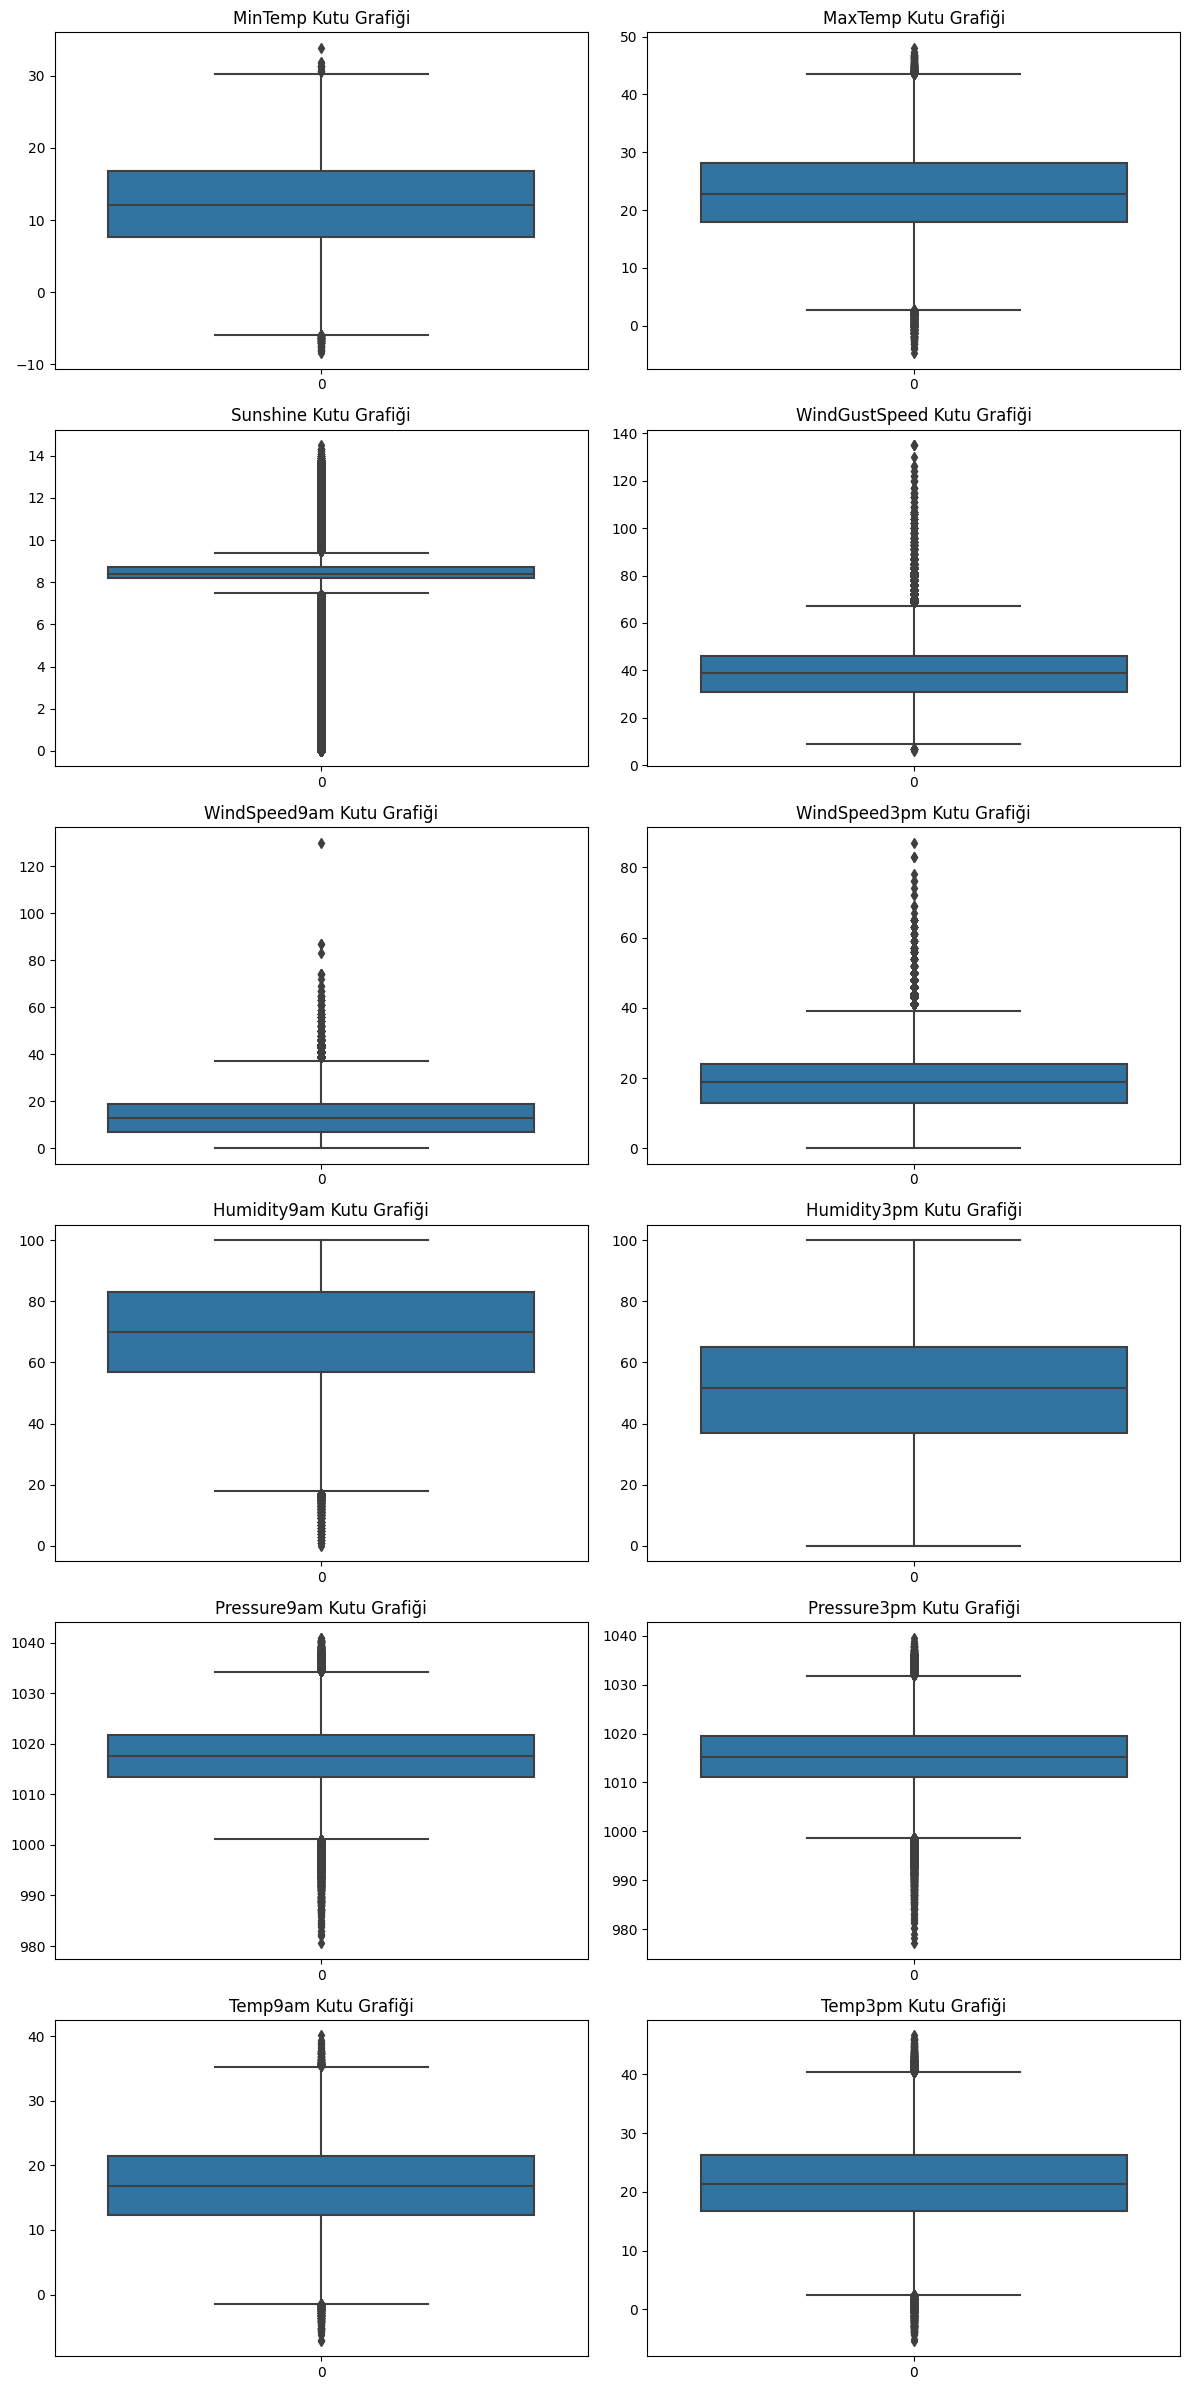

In [15]:
columns2 = ["MinTemp","MaxTemp", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Temp9am","Temp3pm"]

m = len(columns2) #columns2 dizisinin uzunluğu alınır
rows = math.ceil(m / 2)  #12 adet değişken olduğu için ikili grafikler oluşturmak adına 2x6 olacak şekilde satır sayısı belirliyoruz.

fig, axes = plt.subplots(rows, 2, figsize=(12, rows * 4))  #Toplam grid alanı görselleştirme için belirlenir.
axes = axes.flatten() #İkili grafikler tek bir satırda yazdırılır.

for t, colx in enumerate(columns2): # t -> hangi grafik olacağı üzerinde döner, colx -> columns2'den değişkenleri alır.
    sns.boxplot(df3[colx], ax=axes[t]) #Kutu grafiklerin dağılımına göre aykırı değerlerle birlikte sırasıyla çizimler gelir.
    axes[t].set_title(f"{colx} Kutu Grafiği")

for k in range(t+1, len(axes)): #Satırdaki grafiklerin sayısı (2) kadar k değer döndürülür.
    fig.delaxes(axes[k]) #Fazladan, örneğin 3.grafik grid alanına girmeye çalışırsa onu siler, döngüye göre aşağı atar.

plt.tight_layout()
plt.show()


In [16]:
from tabulate import tabulate #Tablo oluşturmak, stil kurmak üzerine geliştirilen bir Python kütüphanesidir.

outlier_summary = pd.DataFrame(columns=["Column", "Outlier_Count", "Outlier_Values"]) #Oluşturmak istediğimiz DataFrame için 3 sütun açıyoruz.

for col in columns2:
    Q1 = df3[col].quantile(0.25) # 1. çeyreklik hesaplaması
    Q3 = df3[col].quantile(0.75) # 3. çeyreklik hesaplaması
    IQR = Q3 - Q1 #Çeyrekler farkı 
    lower_bound = Q1 - 1.5 * IQR #Soldan/alttan kutu grafiğinin kesişiminden öncesi bulunan noktaların sınırı.
    upper_bound = Q3 + 1.5 * IQR #Sağdan/üstten kutu grafiğinin kesişiminden sonrası bulunan noktaların sınırı.
    
    outliers = df3[(df3[col] < lower_bound) | (df3[col] > upper_bound)][col] #Aykırı değerlerin Q1 - (1.5).IQR < değer < Q3 + (1.5).IQR eşitsizliği arasında olması beklenir. Böylese alt ve üst sınırlarda hangi değerlerin olduğunu görebiliriz.

    #Tablo şekillendirmek için sütunlara gelecek değerleri belirleyelim.
    outlier_summary = pd.concat([
        outlier_summary, 
        pd.DataFrame({
            "Column": [col], #Değişkenler yazılır.
            "Outlier_Count": [outliers.count()], #Outlier adedi yazılır.
            "Outlier_Values": [outliers.values[:10]]  #Outlier sayısında çok fazla değer varsa sadece ilk 10 tanesi alınır.
        })
    ], ignore_index=True)

print(tabulate(outlier_summary, headers='keys')) #Tablo stili ile beraber çıktı verilir.


    Column           Outlier_Count  Outlier_Values
--  -------------  ---------------  -----------------------------------------------------------------------
 0  MinTemp                     82  [-6.9 -6.5 -6.3 -6.3 -8.  -6.7 -6.3 -6.1 -6.  -6.6]
 1  MaxTemp                    544  [44.8 43.6 43.7 45.8 45.1 44.4 44.4 46.4 43.9 45.4]
 2  Sunshine                 61856  [12.3 13.  13.3 10.6 12.2  0.  12.6 13.2 12.3 12.7]
 3  WindGustSpeed             5523  [80. 98. 83. 70. 69. 98. 70. 72. 85. 78.]
 4  WindSpeed9am              1817  [48. 39. 44. 39. 43. 41. 46. 39. 43. 39.]
 5  WindSpeed3pm              2523  [48. 46. 50. 44. 46. 44. 41. 43. 41. 41.]
 6  Humidity9am               1425  [17. 17. 15.  9. 15. 12. 13. 16. 12. 16.]
 7  Humidity3pm                  0  []
 8  Pressure9am               2758  [ 994.3  997.8 1000.5 1000.5 1036.3 1035.2 1035.2 1034.5 1037.3 1036.9]
 9  Pressure3pm               2524  [ 993.   997.8  996.9  997.6 1033.6 1032.  1033.8 1035.2 1032.9 1032. ]
10  Temp9a

Genel olarak kutu grafiklerini incelediğimizde Humidity3pm (Öğlen 3'de ölçülen nem oranı) değişkenine ait aykırı değerler gözlemlenmediği ancak geri kalan değişkenlerde aykırı değerler olduğu için datanın dağılımını oldukça etkilediği görülmektedir.

Örneğin Temp9am ile Temp3pm değişkenleri için aykırı değerler, datanın sayısına göre oldukça azdır ancak outlier dağılımı hem üstte hem de altta için kutu grafiğinde dağılımı simetrik göstermemektedir. Bu durum sabah 9 ile öğlen 3 arasında sıcaklıkların oldukça farklı değerler gözlenmesine yol açmıştır.

Bunlardan farklı olarak Sunshine değişkeni için aykırı değerler, bu değişkenin data sayısına bakıldığında oldukça fazla olduğu görülmektedir. Kutu grafiği oldukça dar ve sıkışık çizildiği için ise güneş ışığı gelme oranını içeren verilerden çok fazla ve çok az değerlerin, sınırları oldukça zorladığı görülmüştür.

WindSpeed9am ve WindSpeed3pm kutu grafiklerinde üstten baskı çok olduğu, outlier değerlerin gerçek değerlerden oldukça fazla arttığı ve dağılımı sağa çarpık olduğu görülmüştür.

Bu değişkenlerin, Humidity3pm dışında, outlier dağılım problemini belli bir çözüm ile optimal bir forma çevirebiliriz. Tüm outlier değerleri silmek anlamlı değildir çünkü bu veriler günaşırı tutulduğu için herbiri spesifik anlam taşıyor olabilir. Silmek yerine daha güncel bir terim olan medyanı yazarak kutu grafiklerini sıkıştırıldığı değerler üzerinden kurtarabilir ve datayı rahatlatabiliriz.

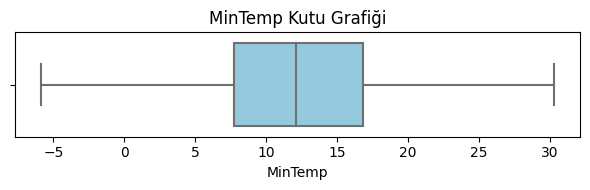

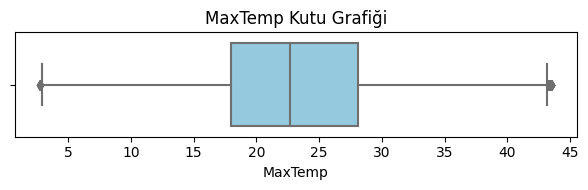

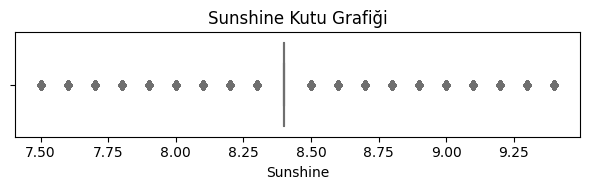

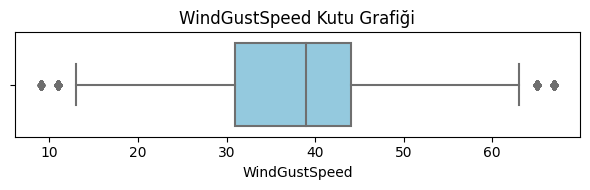

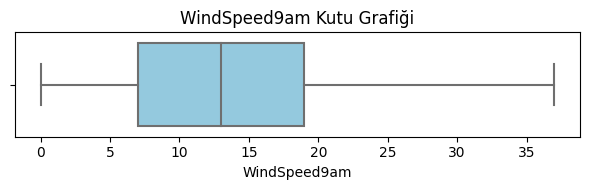

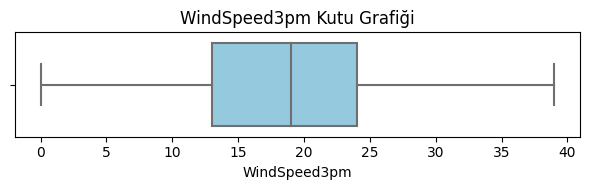

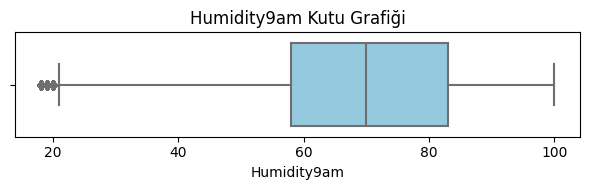

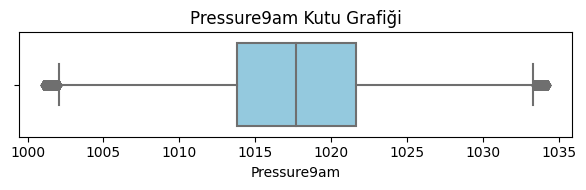

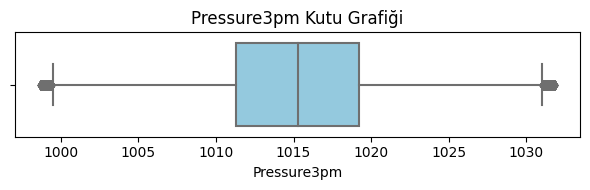

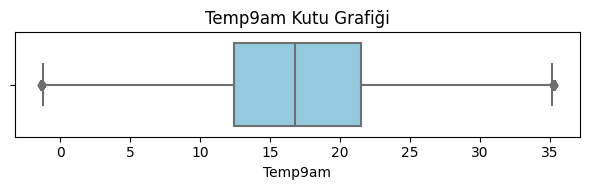

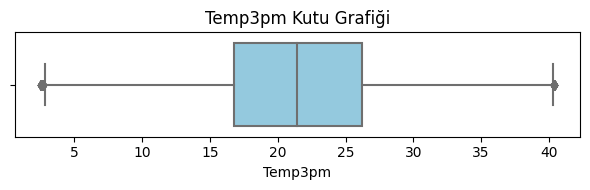

In [17]:
for col in columns2:
    if col != "Humidity3pm": #Aykırı değer olmayan değişkeni almadan diğerleri üzerinden işlem yapabiliriz.
        Q1 = df3[col].quantile(0.25)
        Q3 = df3[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median = df3[col].median()  #her birinin medyan hesaplaması alınır.

    df3.loc[(df3[col] < lower_bound) | (df3[col] > upper_bound), col] = median # Q1 - (1.5).IQR < değer < Q3 + (1.5).IQR istatiksel aralığı etiketleme de medyana eşit olur. 

for col in columns2:
    if col != "Humidity3pm":
        plt.figure(figsize=(6, 2))
        sns.boxplot(x=df3[col], color='skyblue')
        plt.title(f"{col} Kutu Grafiği")
        plt.tight_layout()
        plt.show()

Outliers temizlenerek daha net bir görüntü elde edilmiş ve dağılımlar kendi aralıkları üzerinden görüntülenmiştir. Burada Sunshine değişkeninde min=0, max=14.5 ve median=8.4 olduğu için değişkenin her bir satırındaki değer aralığı da oldukça küçülmüştür.

In [18]:
df3.update(df2[columns2])
df3.head(5)

,MinTemp,MaxTemp,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,8.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,7.4,25.1,8.4,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,12.9,25.7,8.4,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,9.2,28.0,8.4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
4,17.5,32.3,8.4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0


# ÖZELLİK SEÇİMİ & KORELASYON MATRİSİ

Belirlenen değişkenler arasındaki ilişkileri incelemek için Korelasyon Matrisi kullanılır. Özellik seçimi, makine öğrenimi algoritmaları için önem taşıyan işlemlerdir. Bu yüzden hedef değişken olmayan, aralarındaki ilişkinin düşük olduğu sütunlar alınmamalıdır çünkü makine öğrenmesi algoritmalarının performansını olumsuz etkileyebilir, hesaplamalarda yavaşlık katabilir, eğitim aşamalarında karmaşıklığa neden olabilir. Bu problemler karşısında Özellik Seçimi yapmalı ve Korelasyon Matrisi üzerinden yorumlarda bulunmalıyız.

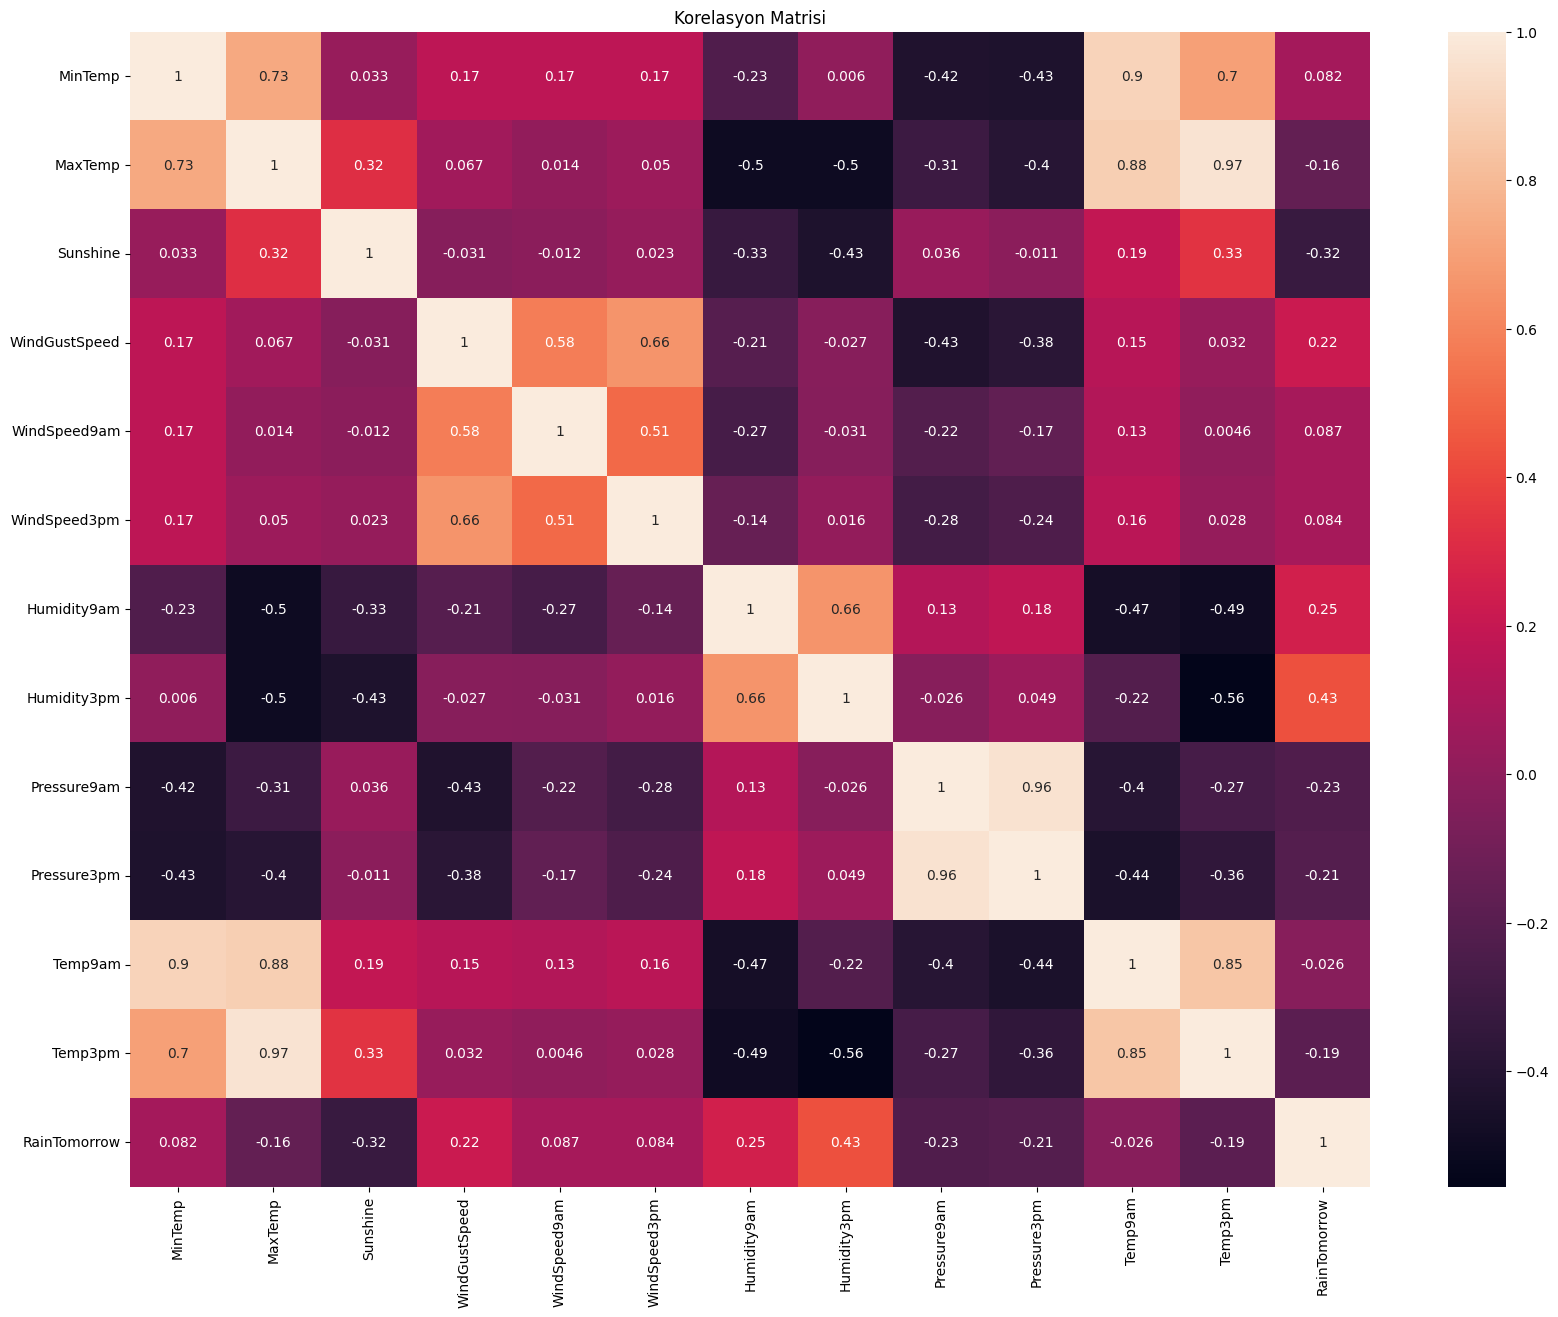

In [19]:
corr_matrix = df3.corr() #df3'te Seaborn kütüphanesi ile korelasyon matrisi oluşturulur.

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True)  #Korelasyon matrisinin haritası ve stili oluşturulur.
plt.title("Korelasyon Matrisi")
plt.show()

Korelasyon matrisinde değerler, -1 ile +1 arasında ilişkiyi kurar. 

-1' e yakın değerler negatif korelasyon, +1'e yakın değerler pozitif korelasyon olarak yorumlanır.

Değerin 0'a yakın olması durumu ise bu iki değişken arasında bir ilişki olmadığını gösterir. RainTomorrow özelliği ile arasındaki korelasyon değeri 0'a yakın olan özellikler, makine öğrenmesi modellerinin eğitim aşamalarında çıkartmak isteyeceğimiz değişkenler olacaktır.

In [20]:
cor_target = abs(corr_matrix["RainTomorrow"])  #Mutlak değerce korelasyon ilişkilerini alır.
relevant_features = cor_target[cor_target>0.1] # 0'a çok yakın olmayan 0.1 değerinden yüksek korelasyona sahip ilgili değişkenleri alır.
relevant_features

MaxTemp          0.156851
Sunshine         0.319412
WindGustSpeed    0.220144
Humidity9am      0.251415
Humidity3pm      0.433179
Pressure9am      0.230975
Pressure3pm      0.211977
Temp3pm          0.187806
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

RainTomorrow değişkeninin kendisiyle olan ilişkisi her zaman 1'dir. Bunun yanı sıra RainTomorrow değişkeni ile günlük olarak tutulan değerler için maksimum sıcaklık, güneş ışığı miktarı, rüzgarın esme hızı, sabah 9 - öğlen 3 nem ve basınç miktarları ve öğlen 3'teki sıcaklık miktarı arasında ilişkiler olduğu görülmüştür.

In [21]:
to_drop = cor_target[cor_target<0.1] # 0'a yakın olan değerler anlamlı ilişki vermeyeceği için onları da bir to_drop değişkeninde toplayabiliriz.
to_drop

MinTemp         0.082173
WindSpeed9am    0.086746
WindSpeed3pm    0.084214
Temp9am         0.025555
Name: RainTomorrow, dtype: float64

Bu durumda RainTomorrow özelliği ile günlük olarak tutulan minimum sıcaklık değeri, sabah 9 - öğlen 3 rüzgar hızı ve sabah 9'daki sıcaklık değerleri arasında ki ilişki düşük korelasyona sahiptir.

In [22]:
type(to_drop) #Pandas serisi olarak to_drop değişkeninin tipini verir.
to_drop_frame = to_drop.to_frame() #Seriden bir dataframe çeviririz
to_drop_frame

row_names = to_drop_frame.index
row_names_list = list(row_names)
row_names_list.append('RainTomorrow')
print(row_names_list) 

['MinTemp', 'WindSpeed9am', 'WindSpeed3pm', 'Temp9am', 'RainTomorrow']


In [23]:
y = df3['RainTomorrow'].values
X = df3.drop(row_names_list, axis=1).values

Train edeceğimiz datalarda bu verilerin olmaması için yukarıdaki işlemler ile bu değerleri düşürüyoruz.

# GÖZETİMLİ ÖĞRENME ALGORİTMALARI

Etiketli veriler ile train datası üzerinden test edilen algoritmalardır. Proje kapsamında;

1. Doğrusal Regresyon (Linear Regression)
2. Lojistik Regresyon (Logistic Regression)
3. Karar Ağaçları (Decision Trees)
4. k-En Yakın Komşu (k-Nearest Neighbors - KNN) Sınıflandırıcısı
5. Destek Vektör Makineleri (Support Vector Machines - SVM)

algoritmaları üzerinden projenin çalışılması gerekmektedir.

Avustralya'da yağmur yağmasına etki eden anlamlı özellikleri keşfettik. O halde RainTomorrow gibi "Yes-No" cevaplarının verildiği ve "No -> 0" ve "Yes -> 1" dönüşümlü cevaplarının alınması sınıflandırma problemidir. Lojistik Regresyon, Karar Ağaçları ve SVM üzerinden değerlendirmelerde bulunarak doğruluk paylarını ölçelim ve bu problem için uygun bir makine öğrenmesi modelizasyonuna karar verelim.

**Datayı Train - Test Olarak Ayırma**

Sklearn kütüphanesi ile datanın belli bir kısmı, genellikle çoğu, eğitim datası olarak ayrılır ve model eğitilmeye başlanır. Geri kalan az miktarda data ile veriler test verisi olarak seçilir ve eğitilen modelin performansına göre değerlendirmelerde bulunulur.

Data'nın %80'ini eğitim için seçelim ve 3 adet makine öğrenmesi modelleri ile performanslarını inceleyelim.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42) #Test verisi %20, eğitilen veri sayısı %80 oranında seçilmiştir.

**1 - Lojistik Regresyon**

Lojistik regresyon, kategorik bir bağımlı değişkenin olasılığını tahmin etmek için kullanılan denetimli bir makine öğrenimi sınıflandırma algoritmasıdır. Doğrusal regresyondan daha karmaşık bir maliyet fonksiyonu kullanır, bu maliyet fonksiyonu doğrusal bir fonksiyon yerine Sigmoid fonksiyon veya lojistik fonksiyon olarak da bilinir. Bu sebepten regresyondan ayrılır ve sınıflandırıcı olmasının temellerini atar.

Sklearn kütüphanesi ile ** LogisticRegression** modülünü çekebilir ve ilgili işlemleri gerçekleştirebiliriz:

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  #Doğruluk kontrolü için accuracy_score; sınıflandırma raporunun detayı için _classification_report; beklenen değerlerin tahmini değerler ile olasılığını karşılaştıran matris için confusion_matrix çekilir.

model = LogisticRegression(max_iter=1000)  #İterasyon sayısı arttırıldıkça modelin kendini tekrarlama olasılığı artar.
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Doğruluk Oranı (Accuracy): 0.8332875017186856

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     22672
           1       0.69      0.44      0.54      6420

    accuracy                           0.83     29092
   macro avg       0.78      0.69      0.72     29092
weighted avg       0.82      0.83      0.82     29092



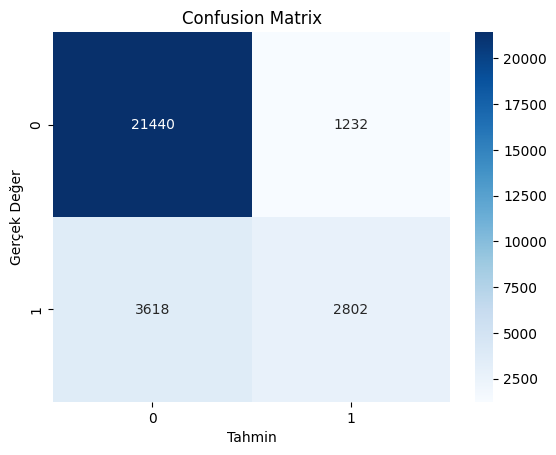

In [26]:
y_pred = model.predict(X_test) #Modelin test edilen değerler üzerinden tahminlerini alır.

print("Doğruluk Oranı (Accuracy):", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Tahmin")
plt.ylabel("Gerçek Değer")
plt.title("Confusion Matrix")
plt.show()

Modelin doğruluğu %83.3 oranıyla başarıyla gerçekleşmiştir. O halde test edilen verilerin çoğunluğu için yüksek oranlıdır.

Bunun yanında sadece yüksek doğruluk payına bakmak yanıltıcı sonuçlar verebilir. Örneğin; buradaki sınıf sayısının dengesizliği söz konusu.

No (0) sınıfı için tahmin edilen 22.672 örnek sayısı varken, Yes (1) sınıfı için tahmin edilen örnek sayısı 6.420'dir. Yaklaşık aradaki oran 3,53 kat, yarınki yağmur yağmama olasılığının fazla olduğunu söylemektedir.

Benzer şekilde model, yarın yağmur yağmama olasılığını %95 olarak yorumluyor ve modelin çalışma açısından iyi bir orandır. Yarın yağma olasılığını ise %44 vererek bu kararda emin olamıyor. 

F1-Score'a göre 0'ların sınıflandırma doğruluğu %90 iken 1'lerin doğruluğunda %54 oranı verebiliyor.

Confusion Matrisi gerçek ve tahmin değerler arasında ne kadarı tahmin edilebildiğinin göstergesidir. Örneğin bu dengelenen sınıflar için iyileştirme ile tahmin edilen değerler artmıştır. Precision oranıyla %86 ile gerçek 0'ların 21.440'ı doğru; %69 ile gerçek 1'lerin ise 2.802 tanesi doğru tahmin edilmiştir.

Buradaki sınıf dengesizliğini iyileştirmek için **class_weight='balanced'** dengeleştirmesini kullanabiliriz:


Doğruluk Oranı (Accuracy): 0.7728928915165681

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.92      0.78      0.84     22672
           1       0.49      0.75      0.59      6420

    accuracy                           0.77     29092
   macro avg       0.70      0.77      0.72     29092
weighted avg       0.82      0.77      0.79     29092



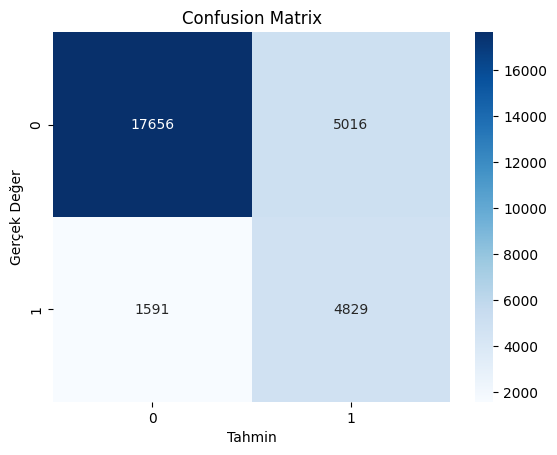

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  #Doğruluk kontrolü için accuracy_score; sınıflandırma raporunun detayı için _classification_report; beklenen değerlerin tahmini değerler ile olasılığını karşılaştıran matris için confusion_matrix çekilir.

model2 = LogisticRegression(max_iter=1000,class_weight='balanced')  #İterasyon sayısı arttırıldıkça modelin kendini tekrarlama olasılığı artar.
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test) #Modelin test edilen değerler üzerinden tahminlerini alır.

print("Doğruluk Oranı (Accuracy):", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Tahmin")
plt.ylabel("Gerçek Değer")
plt.title("Confusion Matrix")
plt.show()

Modelin doğruluğu %77.2 oranıyla başarıyla gerçekleşmiştir. O halde test edilen verilerin çoğunluğu için yüksek oranlıdır.

Benzer şekilde model recall değeri ile, yarın yağmur yağmama olasılığını %78 olarak yorumluyor ve modelin çalışma açısından iyi bir orandır. Yarın yağma olasılığını ise %75 vererek bu kararı az önceki sonuca göre yükseltiyor.

F1-Score'a göre 0'ların sınıflandırma doğruluğu %84 iken 1'lerin doğruluğunda %59 oranı verebiliyor. Tahmin edebilme olasılığı arttı.

Confusion Matrisi gerçek ve tahmin değerler arasında ne kadarı tahmin edilebildiğinin göstergesidir. Örneğin bu dengelenen sınıflar için iyileştirme ile tahmin edilen değerler artmıştır. Precision oranıyla %92 ile gerçek 0'ların 17.656'sı doğru; %49 ile gerçek 1'lerin ise 4.829 tanesi doğru tahmin edilmiştir.

**2 - Karar Ağaçları**

Makine öğreniminde karar ağaçları bir akış şemasına veya karar şemasına benzeyen bir gözetimli öğrenme algoritmasıdır. Genellikle koşullara bağlı olarak sonuçlandırmalarını yapar.

Sklearn kütüphanesi ile ** DecisionTreeClassifier** modülünü çekebilir ve ilgili işlemleri gerçekleştirebiliriz:

Doğruluk Oranı (Accuracy): 0.7800769971126083

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86     22672
           1       0.50      0.49      0.50      6420

    accuracy                           0.78     29092
   macro avg       0.68      0.68      0.68     29092
weighted avg       0.78      0.78      0.78     29092



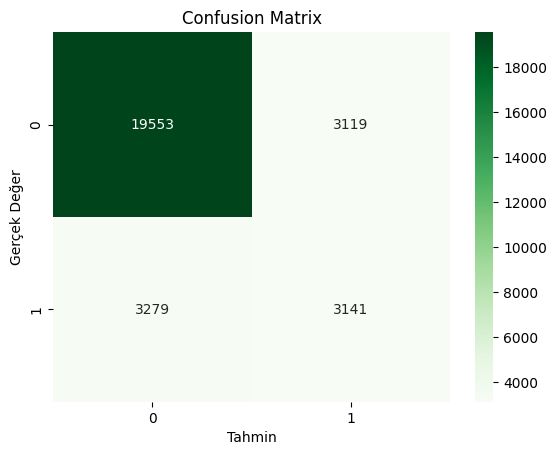

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

X = df3.drop("RainTomorrow", axis=1)
y = df3["RainTomorrow"]

dt_model = DecisionTreeClassifier(random_state=42,class_weight='balanced') #Karar ağacı modeli fonksiyonu.
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

# Doğruluk ve sınıflandırma raporu
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk Oranı (Accuracy):", accuracy)
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel("Tahmin")
plt.ylabel("Gerçek Değer")
plt.title("Confusion Matrix")
plt.show()


Modelin doğruluğu yaklaşık %78.1 oranıyla başarıyla gerçekleşmiştir. O halde test edilen verilerin çoğunluğu için yüksek oranlıdır.

Benzer şekilde model recall değeri ile, yarın yağmur yağmama olasılığını %86 olarak yorumluyor ve modelin çalışma açısından iyi bir orandır. Yarın yağma olasılığını ise %49 vererek bu kararı sınırda tutuyor.

F1-Score'a göre 0'ların sınıflandırma doğruluğu %86 iken 1'lerin doğruluğunda %50 oranı verebiliyor.

Confusion Matrisinde ise bu dengelenmiş sınıflar için tahmin edilen değerlerin sayısını görüyoruz. Precision oranıyla %86 ile gerçek 0'ların 19.553'si doğru; %50 ile gerçek 1'lerin ise 3.141 tanesi doğru tahmin edilmiştir.

**3 - Destek Vektör Makineleri**

Destek vektör makineleri, veri noktalarını sınıflara en iyi ayıran (veya en genelleştirilebilir olan) karar sınırını hedefleyerek, veri noktaları arasında karar sınırları çizerek çalışır. Bir destek vektör makinesi kullanırken amaç, noktalar arasındaki karar sınırının mümkün olduğu kadar büyük olması ve böylece herhangi bir veri noktası ile sınır çizgisi arasındaki mesafenin maksimize edilmesidir.

SVM kullanmadan önce standardizasyon işlemi uygulamalı ve aralık değerlerini sınırlandırmalıyız.

In [21]:
from sklearn.preprocessing import StandardScaler

X = df3.drop("RainTomorrow", axis=1)
y = df3["RainTomorrow"]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Bu adımdan sonra SVM'i kurmaya başlayabiliriz. Bu adım fazla yavaş çalışabilir (benim CPU ve RAM desteğime göre 9 dk) çünkü 150.000'e yakın datanın %20'si test edilecek. Bu da yaklaşık 30.000 datanın, eğitilmiş yaklaşık 120.000 dataya karşılık test edilmesi demektir.

SVM'in parametrelerinden biri olan ve çalışmasını oldukça etkileyen faktörlerden biri de kernel (çekirdek) seçimidir. Modelin çekirdeğini default olarak RBF  - Radial Basis Function olarak bırakmamızın sebebi her veri noktasına uyumlu olacak şekilde karar vermesini sağlamaktır. Her veri noktası meteorolojik olarak anlamlı olduğundan ve linear olarak ayrılmadığından (çünkü normal dağılıma uymayanlar vardı) kayıp yaşamamak için modelin performansı RBF çekirdeği üzerinden devam etmelidir. Linear olursa anlamlı noktalar kaybolabilir; Sigmoid olursa da daha teknik, deep learning bilgisi ile devam edilmesi gerekebilir.

Doğruluk Oranı (Accuracy): 0.7892204042348412

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     22672
           1       0.51      0.77      0.62      6420

    accuracy                           0.79     29092
   macro avg       0.72      0.78      0.74     29092
weighted avg       0.83      0.79      0.80     29092



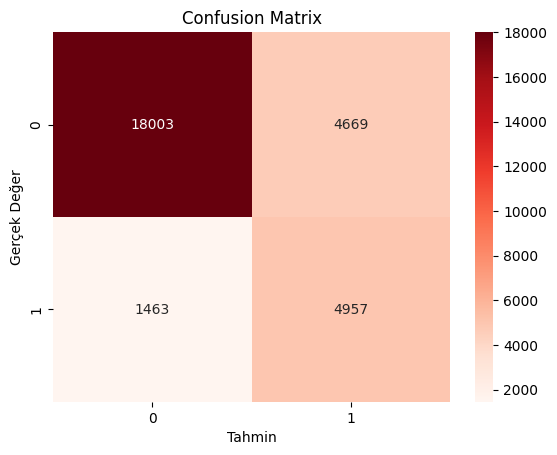

In [30]:
from sklearn.svm import SVC  #SVM için indirilmesi gereken kütüphane
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

svm_model = SVC(random_state=42,class_weight='balanced') #Dengelenmiş sınıflar için SVC modülünün kullanılmasını istiyoruz.
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled) #Standardizasyon işleminden geçen test verilerinin model sonucu tahmini değerlerini alıyoruz.

accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk Oranı (Accuracy):", accuracy)
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.xlabel("Tahmin")
plt.ylabel("Gerçek Değer")
plt.title("Confusion Matrix")
plt.show()

Modelin doğruluğu yaklaşık %78.9 oranıyla başarıyla gerçekleşmiştir. O halde test edilen verilerin çoğunluğu için yüksek oranlıdır.

Benzer şekilde model recall değeri ile, yarın yağmur yağmama olasılığını %79 olarak yorumluyor ve modelin çalışma açısından iyi bir orandır. Yarın yağma olasılığını ise %77 vererek bu kararı yüksek seviyede tutuyor.

F1-Score'a göre 0'ların sınıflandırma doğruluğu %85 iken 1'lerin doğruluğunda %62 oranı verebiliyor.

Confusion Matrisinde ise bu dengelenmiş sınıflar için tahmin edilen değerlerin sayısını görüyoruz. Precision oranıyla %92 ile gerçek 0'ların 18.003'ü doğru; %51 ile gerçek 1'lerin ise 4.957 tanesi doğru tahmin edilmiştir.

# ÇAPRAZ DOĞRULAMA - CROSS VALIDATION

Çapraz doğrulama, seçilen modellerin performansını değerlendirmek için kullanılan ve verilerin genellenebilirliğini test eden bir yöntemdir. Kullandığımız set için yağmur yağmama (0) olsalığını içeren bu cevap çoğunluğu olduğu için genel olarak sınıf dağılımı dengesiz görünmekte. Bu haliyle yukarıdaki 3 modelde dengeleştirme uyguladığımızda daha optimal sonuçlar aldık fakat model performansı için ciddiyetini ölçmedik. Çapraz doğrulama ile kontrol sağlayalım ve uygun modeli seçmek için analiz edelim:

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
import numpy as np

X = df3.drop("RainTomorrow", axis=1)
y = df3["RainTomorrow"]

# Standartlaştırma + Model pipeline'ları
logreg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
tree = DecisionTreeClassifier()
svm = make_pipeline(StandardScaler(), SVC())

# 5-Fold Cross-Validation
logreg_scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
tree_scores = cross_val_score(tree, X, y, cv=5, scoring='accuracy')
svm_scores = cross_val_score(svm, X, y, cv=5, scoring='accuracy')

# Sonuçları yazdır
print("Logistic Regression Accuracy: ", np.mean(logreg_scores))
print("Decision Tree Accuracy: ", np.mean(tree_scores))
print("SVM Accuracy: ", np.mean(svm_scores))


Logistic Regression Accuracy:  0.8365323800357487
Decision Tree Accuracy:  0.7608483431871305
SVM Accuracy:  0.8415234428708922


5 katlı manifold (4 parça eğitim, 1 parça test) için Lojistik regresyon genellenebilirliği %83.6, Karar Ağaçları genellenebilirliği %76.1 ve SVM genellenebilirliği %84.1'e ulaşmıştır.

Bu durumda SVM ile ilerlemek büyük veri setli, RBF çekirdekli olmasından kaynaklı uzun süren sonuçlar verse de; en makul model seçimi destek vektör makineleri üzerine hareket etmek olacaktır.

# HİPERPARAMETRE OPTİMİZASYONU

SVM modeli ile **MaxTemp, Sunshine, WindGustSpeed, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp3pm** özelliklerine bağlı olarak **RainTomorrow** değişkeninini en iyi performansla tahmin etmeye ve geliştirmeye devam ettik.

Hiperparametre optimizasyonu yapmak genel anlamda her modelin çalışabilmesi için iyileştirici denemelerde bulunmaktır. Destek vektör makinelerinin hiperparametreleri çekirdek, C (hata payı), gamma (veri noktalarına yakınlık - uzaklık)'dan oluşur. Bu sayede modelin aşırı öğrenme - overfitting veya az uyum sağlama - underfitting durumlarının önüne geçme şansımız olur.

Hiperparametre optimizasyonunu sağlamak için özel fonksiyon olan **RandomizedSearchCV** kullanalım. Veri boyutu çok yüksek olduğu için geniş ölçekte devam etmek hızlı sonuçlar almamıza yardımcı olabilir.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import uniform


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])  #Daha önce standardize etmiştik. Dolayısıyla burada sıralı ikili halinde fonksiyonları alabiliriz.

param_distributions = {
    'svc__C': uniform(0.1, 10),  # C değerinin optimal denemeleri 
    'svc__gamma': uniform(0.001, 1),  #Verinin uzaklığına bağlı olan sayısal uzaklıklar
    'svc__kernel': ['rbf', 'linear']  #Çekirdek denemeleri
}

random_search = RandomizedSearchCV(
    pipeline, param_distributions,
    n_iter=20, cv=5, scoring='accuracy', verbose=2, random_state=42
)

random_search.fit(X_train, y_train)
print("En iyi parametreler:", random_search.best_params_)
print("En iyi doğruluk:", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END svc__C=3.845401188473625, svc__gamma=0.9517143064099162, svc__kernel=rbf; total time=20.9min
[CV] END svc__C=3.845401188473625, svc__gamma=0.9517143064099162, svc__kernel=rbf; total time=20.1min
[CV] END svc__C=3.845401188473625, svc__gamma=0.9517143064099162, svc__kernel=rbf; total time=19.5min
[CV] END svc__C=3.845401188473625, svc__gamma=0.9517143064099162, svc__kernel=rbf; total time=19.7min


Standardizasyon işlemi gerçekleşmiş, sınıfların dengelenmesi için yeni parametre girilmiş SVM sınıflandırması için hiperparametre optimizasyonu gerçekleştirmiş olduk. Yukarıdaki sonuçlara göre 5 manifoldlu incelemede C=3.85 alınmalı ve denge problemi yaşayan 1 ve 0'ların probleminde hata yapabilme düzeyini yüksek tutmalıyız. Aynı zamanda gamma = 0.95 demeli ve herbir RBF çekirdeğine bağlı veriler arasındaki mesafeyi oldukça düşük tutmalıyız, bu da veriler arası anlam ilişkisini yüksek tutabilir. 

Bu model üzerinden yapılan çalışma boyunca 23 sütun, 145.460 satırdan oluşan bu dataset için ciddi bir CPU harcaması ve RAM kullanımı gerçekleşmiştir. 145.460 x 23 'lük bir matris hesabı düşündüğümüzde total harcanan miktarın +20 dakikayı geçtiğini görmekteyiz.

In [ ]:
from sklearn.svm import SVC  #SVM için indirilmesi gereken kütüphane
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

svm_model = SVC(C=3.85, gamma=0.95, random_state=42,class_weight='balanced') #Hiperparametre optimizasyonu ile verileri giriyoruz.
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled) #Standardizasyon işleminden geçen test verilerinin model sonucu tahmini değerlerini alıyoruz.

accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk Oranı (Accuracy):", accuracy)
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Reds')
plt.xlabel("Tahmin")
plt.ylabel("Gerçek Değer")
plt.title("Confusion Matrix")
plt.show()

# SONUÇ

Çapraz doğrulama yaptığımız yukarıdaki modeller için en uygunu destek vektör makineleri oldu. Hem doğrulama (accuracy) değerinin yüksek olması hem de "evet" ile "hayır" cevaplarına kıyasla en iyi precision, recall, F1-score değerleri yüksek geldi. Geliştirmek için hiperparametre optimizasyonu yaparak bu modelin kullanılabilirliğini test etmiş olduk. Burada Kaggle ortamının CPU'sunu deneyerek 150.000'e yakın veri üzerinde çalıştık.

Bunun yanı sıra **RainTomorrow** değişkeni ile günlük olarak tutulan değerler için **maksimum sıcaklık, güneş ışığı miktarı, rüzgarın esme hızı, sabah 9 - öğlen 3 nem ve basınç miktarları ve öğlen 3'teki sıcaklık miktarı** arasında ilişkiler olduğu görülmüştür.

Avustralya'da yaşayan bireyler, ziyaretçiler, haberlerde sunmak isteyen meteoroloji uzmanları günlük tutulan veriler ile eğittiğimiz ve testlerini gerçekleştirdiğimiz bu modeli kullanarak "Avustralya'da yarın yağmur var mı?" sorusuna kolaylıkla yanıt alabilirler. Bu meteorolijik problem ile makine öğrenmesi üzerinde çalışmalarda bulunarak her verinin işlenmesi ile neler yapabileceğimizi keşfettik.

Bu problemin geliştirme aşamasında ilerlemek için NLP kullanarak modeli otomasyona çevirebilir; uygun değişkenlerin verilerini girdiğinizde yanıtlar verecek şekilde bir ChatBot geliştirebilirsiniz.


# KAYNAKLAR

1. https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data
2. https://bulutistan.com/blog/lojistik-regresyon-nedir/
3. https://github.com/gokerguner/example-repo/blob/main/supervised.ipynb
4. https://www.kaggle.com/code/goker67/everything-on-gpu-ml-with-cuml-polars-cupy
5. https://ravenfo.com/2021/02/11/aykiri-deger-analizi/
6. https://www.grammarly.com/blog/ai/what-is-decision-tree/
7. https://www.unite.ai/tr/what-are-support-vector-machines/
8. https://cmap-repos.github.io/cmapplot/articles/colors.html
9. https://gokerguner.medium.com/machine-learning-1-7d4581caa291